In [1]:
# https://hoonzi-text.tistory.com/19
# https://techblog-history-younghunjo1.tistory.com/114

import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://news.daum.net/breakingnews/?page=1&regDate=20210421'
html = requests.get(url)
soup = BeautifulSoup(html.content, "html.parser")

In [3]:
html.content

b'\n<!DOCTYPE html>\n\n\n\n<html lang="ko" class="os_unknown none unknown version_0 ">\n<head>\n<meta charset="utf-8">\n<meta name="referrer" content="always" />\n\n<meta property="og:author" content="Daum \xeb\x89\xb4\xec\x8a\xa4" />\n<meta property="og:site_name" content="\xeb\x8b\xa4\xec\x9d\x8c\xeb\x89\xb4\xec\x8a\xa4" />\n<meta property="og:title" content="\xec\xa0\x84\xec\xb2\xb4\xeb\x89\xb4\xec\x8a\xa4"/>\n<meta property="og:image" content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" />\n<meta property="og:description" content="\xeb\x8b\xa4\xec\x9d\x8c\xeb\x89\xb4\xec\x8a\xa4" />\n<meta property="og:url" content="https://news.daum.net/breakingnews/" />\n<link rel="shortcut icon" href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico">\n\n<title>\xec\xa0\x84\xec\xb2\xb4\xeb\x89\xb4\xec\x8a\xa4 | \xeb\x8b\xa4\xec\x9d\x8c\xeb\x89\xb4\xec\x8a\xa4</title>\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n<link rel="stylesheet" type="text/css" href="

In [4]:
# 다른 사이트에서 크롤링해오려면 페이지 구조를 먼저 파악할 필요 있음.
# ul 태그를 가진 것들 중에 class로 list_news2 혹은 list_allnews를 가진 것들을 가져와라.
news_section = soup.find('ul',{'class':'list_news2 list_allnews'})

# 전체 기사 목록의 제목들과 해당 기사의 url이 담긴 tag값
# a 태그를 가진 것들 중에 class로 link_txt가 가진 것들을 가져와라.
news_list = news_section.find_all('a',{'class':'link_txt'})

In [5]:
news_list

[<a class="link_txt" href="https://v.daum.net/v/20210421235959345">오정연 "날씨 파악 못 한 옷차림"</a>,
 <a class="link_txt" href="https://v.daum.net/v/20210421235951344">Russia Navalny Protests</a>,
 <a class="link_txt" href="https://v.daum.net/v/20210421235937343">정세균 "이재명, 러 백신 언급 전 먼저 정부에 물어봤어야"</a>,
 <a class="link_txt" href="https://v.daum.net/v/20210421235934342">남원 대나무밭 화재 현장서 80대 남성 숨진 채 발견</a>,
 <a class="link_txt" href="https://v.daum.net/v/20210421235829341">너무나 매력적인 그녀, 조 카잔_요주의 여성 #11</a>,
 <a class="link_txt" href="https://v.daum.net/v/20210421235823340">밀양시 "새 교통정책으로 교통사고율 30% 감소"</a>,
 <a class="link_txt" href="https://v.daum.net/v/20210421235814339">뉴이스트 백호, 외조모상 "22일 일정 불참"[공식]</a>,
 <a class="link_txt" href="https://v.daum.net/v/20210421235813338">[부산 리포트]호투하다 홈런 2방 맞은 김진욱에게. 최고참의 격려 "다음엔 더 씩씩하게"</a>,
 <a class="link_txt" href="https://v.daum.net/v/20210421235810337">Russia Navalny Protests</a>,
 <a class="link_txt" href="https://v.daum.net/v/20210421235807336">Russia Navalny P

In [6]:
article_list = [] # 기사가 담길 리스트 선언

# news_list를 순회하며 값을 조회한다.
# 제목은 전체 기사에서, 본문은 url을 타고 가서 가져온 HTML에서 가져온다.
for news in news_list: # 리스트에는 제목&url이 들어있는 tag 들이 들어있다.
    article_title = news.text # 제목을 가져오기
    article_url = news.get('href') # url을 가져오기
    article_html = requests.get(article_url) # 가져온 url을 통해 html을 가져오기
    soup = BeautifulSoup(article_html.content, "html.parser")
    # 본문 텍스트가 있는 영역 혹은 태그의 값을 가져온다.
    text_list = [text_tag.text for text_tag in soup.find_all('p',{'dmcf-ptype':"general"})]
    # 리스트 형태이기 때문에 띄어쓰기 단위로 하나의 텍스트로 변환
    article_content = " ".join(text_list)
    article = dict()
    article['title'] = article_title
    article['content'] = article_content
    article_list.append(article) # 기사 담기
    print(article_title, article_content)
    print()

오정연 "날씨 파악 못 한 옷차림" [스포츠경향]  방송국 아나운서 출신 방송인 오정연이 SNS에 유머러스한 멘트를 더 한 사진을 올렸다.오정연이 공개한 사진에는 차분한 체크무늬가 들어간 가을 정취가 나는 옷을 입고 있는 자신의 모습이 담겨있다.오정연은 초여름 날씨에 가까웠던 이날 낮 기후에 옷이 안 어울린다는 점을 “날씨 파악 못 한 옷차림”이라는 글을 남겼고 사진 위 귀여운 태양 그림과 글 귀 옆에는 땀을 흘리는 이모티콘도 더했다.오정연은 2006년부터 2015년까지 KBS 아나운서로 재직했다. 그는 tvN ‘나는 살아있다’, STATV ‘숙희네 미장원’, SBS CNBC ‘집사의 선택’ 등에 출연하며 다양한 활동을 이어가고 있다.손봉석 기자 paulsohn@kyunghyang.com

Russia Navalny Protests A Russian police officer films people ahead of the possible opposition rally in support of jailed opposition leader Alexei Navalny in Khabarovsk, 6,100 kilometers (3,800 miles) east of Moscow, Russia, Wednesday, April 21, 2021. Navalny's team has called for nationwide protests on Wednesday following reports that the politician's health was deteriorating in prison, where he has been on hunger strike since March 31. Russian authorities have stressed that the demonstrations were not authorized and warned against participating in them. (AP Photo/Igor Volkov) ▶연합뉴스 앱 지금 바로 다운받기~ <저작권

In [7]:
import time

article_list = [] # 기사가 담길 리스트 선언
index = 1 # page 이동을 위한 index 설정
for i in range(0, 500):
	# page 를 변경하며 한페이지의 전체기사 목록을 가져오기
    url = 'https://news.daum.net/breakingnews/?page={}&regDate=20210421'.format(index)
    index += 1 
    html = requests.get(url)
    soup = BeautifulSoup(html.content, "html.parser")
    news_section = soup.find('ul',{'class':'list_news2 list_allnews'})
    news_list = news_section.find_all('a',{'class':'link_txt'})
    if len(news_list) < 15: # page내 기사가 15개 미만이라면 마지막 page로 간주, 반복문 탈출!
        break
    
    for news in news_list:
        article_title = news.text
        article_url = news.get('href')
        try:
            article_html = requests.get(article_url)
            soup = BeautifulSoup(article_html.content, "html.parser")
            text_list = [text_tag.text for text_tag in soup.find_all('p',{'dmcf-ptype':"general"})]
            article_content = " ".join(text_list)
			# 기사 정보를 제목과 본문으로 저장하기 위한 dictionary 형태로 변환
            article = dict()
            article['title'] = article_title
            article['content'] = article_content
        except:
            continue
        
        article_list.append(article) # 기사 담기
    # 중간중간 잘 진행되는지 여부 확인을 위해 기사 개수가 10배수 일때마다 표시하기
    if len(article_list) % 10 == 0: 
        print(index, len(article_list))
        time.sleep(0.5) # 가져오는 작업이 서버의 부담을 줄수있기에 잠깐씩 쉬어준다.

3 30
5 60
7 90
9 120
11 150
13 180
15 210
17 240
19 270
21 300
23 330
25 360
27 390
29 420
31 450
33 480
35 510
37 540
39 570
41 600
43 630
45 660
47 690
49 720
51 750
53 780
55 810
57 840
59 870
61 900
63 930
65 960
67 990
69 1020
71 1050
73 1080
75 1110
77 1140
79 1170
81 1200
83 1230
85 1260
87 1290
89 1320
91 1350
93 1380
95 1410
97 1440
99 1470
101 1500
103 1530
105 1560
107 1590
109 1620
111 1650
113 1680
115 1710
117 1740
119 1770
121 1800
123 1830
125 1860
127 1890
129 1920
131 1950
133 1980
135 2010
137 2040
139 2070
141 2100
143 2130
145 2160
147 2190
149 2220
151 2250
153 2280
155 2310
157 2340
159 2370
161 2400
163 2430
165 2460
167 2490
169 2520
171 2550
173 2580
175 2610
177 2640
179 2670
181 2700
183 2730
185 2760
187 2790
189 2820
191 2850
193 2880
195 2910
197 2940
199 2970
201 3000
203 3030
205 3060
207 3090
209 3120
211 3150
213 3180
215 3210
217 3240
219 3270
221 3300
223 3330
225 3360
227 3390
229 3420
231 3450
233 3480
235 3510
237 3540
239 3570
241 3600
243 3630


In [8]:
import pandas as pd

df = pd.DataFrame(article_list, columns = ['title','content'])
df.to_pickle("daum_news.pkl")

In [9]:
df.head()

,title,content
0,"오정연 ""날씨 파악 못 한 옷차림""",[스포츠경향] 방송국 아나운서 출신 방송인 오정연이 SNS에 유머러스한 멘트를 더...
1,Russia Navalny Protests,A Russian police officer films people ahead of...
2,"정세균 ""이재명, 러 백신 언급 전 먼저 정부에 물어봤어야""",정세균 전 국무총리가 이재명 경기도지사의 신종 코로나바이러스 감염증(코로나19) ...
3,남원 대나무밭 화재 현장서 80대 남성 숨진 채 발견,(남원=연합뉴스) 홍인철 기자 = 21일 오후 6시 40분께 전북 남원시 보절면 도...
4,"너무나 매력적인 그녀, 조 카잔_요주의 여성 #11",내가 남자라면 저런 여자랑 사랑에 빠졌을 꺼야. 〈루비 스팍스〉에서 조 카잔을 처...


In [10]:
from konlpy.tag import Okt

okt = Okt() # 형태소 분석기 객체 생성
noun_list = []
for content in df['content']: 
    nouns = okt.nouns(content) # 명사만 추출하기, 결과값은 명사 리스트
    noun_list.append(nouns)

df['nouns'] = noun_list

In [11]:
df.head()

,title,content,nouns
0,"오정연 ""날씨 파악 못 한 옷차림""",[스포츠경향] 방송국 아나운서 출신 방송인 오정연이 SNS에 유머러스한 멘트를 더...,"[스포츠경향, 방송국, 아나운서, 출신, 방송인, 오정연, 멘트, 더, 사진, 오정..."
1,Russia Navalny Protests,A Russian police officer films people ahead of...,"[연합뉴스, 앱, 지금, 바로, 다운, 저작권, 연합뉴스, 무단, 재, 재, 배포,..."
2,"정세균 ""이재명, 러 백신 언급 전 먼저 정부에 물어봤어야""",정세균 전 국무총리가 이재명 경기도지사의 신종 코로나바이러스 감염증(코로나19) ...,"[정세균, 전, 국무총리, 이재명, 도지사, 신종, 코로나바이러스, 감염증, 코로나..."
3,남원 대나무밭 화재 현장서 80대 남성 숨진 채 발견,(남원=연합뉴스) 홍인철 기자 = 21일 오후 6시 40분께 전북 남원시 보절면 도...,"[남원, 연합뉴스, 홍인, 철, 기자, 오후, 전북, 남원시, 보절면, 도룡리, 마..."
4,"너무나 매력적인 그녀, 조 카잔_요주의 여성 #11",내가 남자라면 저런 여자랑 사랑에 빠졌을 꺼야. 〈루비 스팍스〉에서 조 카잔을 처...,"[내, 남자라면, 저런, 여자, 사랑, 루비, 스팍스, 조, 카잔, 처음, 때, 생..."


In [12]:
drop_index_list = [] # 지워버릴 index를 담는 리스트
for i, row in df.iterrows():
    temp_nouns = row['nouns']
    if len(temp_nouns) == 0: # 만약 명사리스트가 비어 있다면
        drop_index_list.append(i) # 지울 index 추가
        
df = df.drop(drop_index_list) # 해당 index를 지우기

# index를 지우면 순회시 index 값이 중간중간 비기 때문에 index를 다시 지정
df.index = range(len(df))

In [13]:
df.head()

,title,content,nouns
0,"오정연 ""날씨 파악 못 한 옷차림""",[스포츠경향] 방송국 아나운서 출신 방송인 오정연이 SNS에 유머러스한 멘트를 더...,"[스포츠경향, 방송국, 아나운서, 출신, 방송인, 오정연, 멘트, 더, 사진, 오정..."
1,Russia Navalny Protests,A Russian police officer films people ahead of...,"[연합뉴스, 앱, 지금, 바로, 다운, 저작권, 연합뉴스, 무단, 재, 재, 배포,..."
2,"정세균 ""이재명, 러 백신 언급 전 먼저 정부에 물어봤어야""",정세균 전 국무총리가 이재명 경기도지사의 신종 코로나바이러스 감염증(코로나19) ...,"[정세균, 전, 국무총리, 이재명, 도지사, 신종, 코로나바이러스, 감염증, 코로나..."
3,남원 대나무밭 화재 현장서 80대 남성 숨진 채 발견,(남원=연합뉴스) 홍인철 기자 = 21일 오후 6시 40분께 전북 남원시 보절면 도...,"[남원, 연합뉴스, 홍인, 철, 기자, 오후, 전북, 남원시, 보절면, 도룡리, 마..."
4,"너무나 매력적인 그녀, 조 카잔_요주의 여성 #11",내가 남자라면 저런 여자랑 사랑에 빠졌을 꺼야. 〈루비 스팍스〉에서 조 카잔을 처...,"[내, 남자라면, 저런, 여자, 사랑, 루비, 스팍스, 조, 카잔, 처음, 때, 생..."


In [14]:
# 정규 표현식을 통한 한글 외 문자 제거
df['content'] = df['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [15]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

# i = 0

# 토큰화는 다른 방식으로도 할 수 있을 것.
tokenized_data = []
for sentence in df['content']:
    # print(i)
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)
    # i += 1

In [16]:
tokenized_data[:5] # 상위 5개 출력

[['스포츠경향',
  '방송국',
  '아나운서',
  '출신',
  '방송인',
  '오정연',
  '유머러스하다',
  '멘트',
  '더',
  '사진',
  '을',
  '올리다',
  '정연',
  '공개',
  '사진',
  '에는',
  '차분하다',
  '체크',
  '무늬',
  '들어가다',
  '가을',
  '정취',
  '나',
  '옷',
  '을',
  '입다',
  '있다',
  '자신',
  '모습',
  '담기다',
  '정연',
  '초여름',
  '날씨',
  '가깝다',
  '날',
  '낮',
  '기후',
  '옷',
  '안',
  '어울리다',
  '점',
  '을',
  '날씨',
  '파악',
  '못',
  '옷차림',
  '이라는',
  '글',
  '을',
  '남기다',
  '사진',
  '위',
  '귀엽다',
  '태양',
  '그림',
  '글',
  '귀',
  '옆',
  '에는',
  '땀',
  '을',
  '흘리다',
  '이모티콘',
  '더하다',
  '정연',
  '년',
  '부터',
  '년',
  '까지',
  '아나운서',
  '로',
  '재직',
  '그',
  '나',
  '살다',
  '숙희',
  '네',
  '미장원',
  '집사',
  '선택',
  '등',
  '출연',
  '다양하다',
  '활동',
  '을',
  '어가',
  '고',
  '있다',
  '손봉석',
  '기자'],
 ['연합뉴스',
  '앱',
  '지금',
  '바로',
  '다운',
  '받다',
  '저작권',
  '연합뉴스',
  '무단',
  '전',
  '재다',
  '배포',
  '금지'],
 ['정세균',
  '전',
  '국무총리',
  '이재명',
  '경',
  '기',
  '도지사',
  '신종',
  '코로나바이러스',
  '감염증',
  '코로나',
  '러시',
  '아산',
  '백신',
  '도입',
  '주장',
  '대해',
  '현재',
  '시점',
  '

In [17]:
type(tokenized_data)

list

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서를 명사 집합으로 보고 문서 리스트로 치환 (tfidfVectorizer 인풋 형태를 맞추기 위해)
text = [" ".join(noun) for noun in df['nouns']]

tfidf_vectorizer = TfidfVectorizer(min_df = 5, ngram_range=(1,5))
tfidf_vectorizer.fit(text)
vector = tfidf_vectorizer.transform(text).toarray()

In [19]:
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
# Term Freqeuncy, 전체 카운팅 된 행렬을 단어들의 이름을 열의 이름으로 하는 행렬로 만들어서 tf로 저장함.
tf = pd.DataFrame(vector, columns = tfidf_vectorizer.get_feature_names())

In [21]:
tf

,가가,가감,가게,가게 기름,가게 기름 냄새,가게 이전,가게 임대료,가게 임대료 임차,가격,가격 거래,...,힐리,힐리 루타,힐리 타점,힐리 타점 루타,힐링,힐링 시설,힐링 시설 사진,힐링 시설 사진 함양군,힐링 시설 사진 함양군 제공,힙합
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df.head()

,title,content,nouns
0,"오정연 ""날씨 파악 못 한 옷차림""",스포츠경향 방송국 아나운서 출신 방송인 오정연이 에 유머러스한 멘트를 더 한 사진...,"[스포츠경향, 방송국, 아나운서, 출신, 방송인, 오정연, 멘트, 더, 사진, 오정..."
1,Russia Navalny Protests,...,"[연합뉴스, 앱, 지금, 바로, 다운, 저작권, 연합뉴스, 무단, 재, 재, 배포,..."
2,"정세균 ""이재명, 러 백신 언급 전 먼저 정부에 물어봤어야""",정세균 전 국무총리가 이재명 경기도지사의 신종 코로나바이러스 감염증코로나 러시아산...,"[정세균, 전, 국무총리, 이재명, 도지사, 신종, 코로나바이러스, 감염증, 코로나..."
3,남원 대나무밭 화재 현장서 80대 남성 숨진 채 발견,남원연합뉴스 홍인철 기자 일 오후 시 분께 전북 남원시 보절면 도룡리의 한 마을 ...,"[남원, 연합뉴스, 홍인, 철, 기자, 오후, 전북, 남원시, 보절면, 도룡리, 마..."
4,"너무나 매력적인 그녀, 조 카잔_요주의 여성 #11",내가 남자라면 저런 여자랑 사랑에 빠졌을 꺼야 루비 스팍스에서 조 카잔을 처음 봤...,"[내, 남자라면, 저런, 여자, 사랑, 루비, 스팍스, 조, 카잔, 처음, 때, 생..."


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서를 명사 집합으로 보고 문서 리스트로 치환 (tfidfVectorizer 인풋 형태를 맞추기 위해)
text = [" ".join(noun) for noun in df['nouns']]

tfidf_vectorizer = TfidfVectorizer(min_df = 5, ngram_range=(1,5))
tfidf_vectorizer.fit(text)
vector = tfidf_vectorizer.transform(text).toarray()

In [24]:
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
# DBSCAN을 활용한 군집화
from sklearn.cluster import DBSCAN
import numpy as np

vector = np.array(vector) # Normalizer를 이용해 변환된 벡터

# 자신을 포함하여 특정 거리(eps) 내에 특정 개수(min_samples) 이상의 샘플이 존재하는 샘플을 핵심 샘플로 간주.
# 핵심 샘플로부터 특정 거리 이내에 있는 모든 샘플은 동일한 클러스터에 소속됨
# 이 이웃에는 다른 핵심 샘플이 포함될 수도 있고, 핵심 샘플들의 연속된 이웃이 하나의 클러스터를 형성할 수도 있음.
model = DBSCAN(eps=0.3,min_samples=6, metric = "cosine")
# metric: 샘플 간의 거리 계산 식으로는 Cosine distance를 이용
result = model.fit_predict(vector) # DBSCAN의 .fit_predict() 함수를 사용
# DBSCAN 클러스터링만 수행하는 .fit() 메서드와 달리 클러스터를 계산하고 레이블을 예측한다.


In [26]:
result

array([-1,  0, -1, ..., -1, -1, -1])

In [27]:
# 각 샘플의 레이블: 핵심 샘플들의 인덱스 또는 이상치 인덱스(-1)
result[:10]

array([-1,  0, -1, -1, -1, -1, -1, -1,  0,  0])

In [28]:
# 핵심 샘플들의 인덱스
model.core_sample_indices_[:10]

array([ 1,  8,  9, 10, 11, 12, 14, 15, 20, 28])

In [29]:
# 핵심 샘플들
model.components_[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
print(len(model.core_sample_indices_)) # 핵심 샘플의 인덱스(핵심 샘플의 개수) 모양의 다차원 배열
print(len(model.components_)) # 핵심 샘플(핵심 샘플 개수, 특성 개수) 모양의 다차원 배열

2805
2805


In [31]:
df['result'] = result

In [32]:
df.head()

,title,content,nouns,result
0,"오정연 ""날씨 파악 못 한 옷차림""",스포츠경향 방송국 아나운서 출신 방송인 오정연이 에 유머러스한 멘트를 더 한 사진...,"[스포츠경향, 방송국, 아나운서, 출신, 방송인, 오정연, 멘트, 더, 사진, 오정...",-1
1,Russia Navalny Protests,...,"[연합뉴스, 앱, 지금, 바로, 다운, 저작권, 연합뉴스, 무단, 재, 재, 배포,...",0
2,"정세균 ""이재명, 러 백신 언급 전 먼저 정부에 물어봤어야""",정세균 전 국무총리가 이재명 경기도지사의 신종 코로나바이러스 감염증코로나 러시아산...,"[정세균, 전, 국무총리, 이재명, 도지사, 신종, 코로나바이러스, 감염증, 코로나...",-1
3,남원 대나무밭 화재 현장서 80대 남성 숨진 채 발견,남원연합뉴스 홍인철 기자 일 오후 시 분께 전북 남원시 보절면 도룡리의 한 마을 ...,"[남원, 연합뉴스, 홍인, 철, 기자, 오후, 전북, 남원시, 보절면, 도룡리, 마...",-1
4,"너무나 매력적인 그녀, 조 카잔_요주의 여성 #11",내가 남자라면 저런 여자랑 사랑에 빠졌을 꺼야 루비 스팍스에서 조 카잔을 처음 봤...,"[내, 남자라면, 저런, 여자, 사랑, 루비, 스팍스, 조, 카잔, 처음, 때, 생...",-1


In [33]:
model.core_sample_indices_[:10]

array([ 1,  8,  9, 10, 11, 12, 14, 15, 20, 28])

In [34]:
df.head()

,title,content,nouns,result
0,"오정연 ""날씨 파악 못 한 옷차림""",스포츠경향 방송국 아나운서 출신 방송인 오정연이 에 유머러스한 멘트를 더 한 사진...,"[스포츠경향, 방송국, 아나운서, 출신, 방송인, 오정연, 멘트, 더, 사진, 오정...",-1
1,Russia Navalny Protests,...,"[연합뉴스, 앱, 지금, 바로, 다운, 저작권, 연합뉴스, 무단, 재, 재, 배포,...",0
2,"정세균 ""이재명, 러 백신 언급 전 먼저 정부에 물어봤어야""",정세균 전 국무총리가 이재명 경기도지사의 신종 코로나바이러스 감염증코로나 러시아산...,"[정세균, 전, 국무총리, 이재명, 도지사, 신종, 코로나바이러스, 감염증, 코로나...",-1
3,남원 대나무밭 화재 현장서 80대 남성 숨진 채 발견,남원연합뉴스 홍인철 기자 일 오후 시 분께 전북 남원시 보절면 도룡리의 한 마을 ...,"[남원, 연합뉴스, 홍인, 철, 기자, 오후, 전북, 남원시, 보절면, 도룡리, 마...",-1
4,"너무나 매력적인 그녀, 조 카잔_요주의 여성 #11",내가 남자라면 저런 여자랑 사랑에 빠졌을 꺼야 루비 스팍스에서 조 카잔을 처음 봤...,"[내, 남자라면, 저런, 여자, 사랑, 루비, 스팍스, 조, 카잔, 처음, 때, 생...",-1


In [35]:
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = df[df['result'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['title']:
            print(title) # 제목으로 살펴보자
        print()

cluster num : 1
"북한서 마지막 국제기구 파견 직원도 철수"
"북한서 마지막 국제기구 파견 직원도 철수"
"북한에 남은 마지막 국제기구 직원 철수..가혹한 제재 해제해야"
"코로나 사태 속 북한에 남은 마지막 국제기구 직원 철수"
"코로나 사태 속 북한에 남은 마지막 국제기구 직원 철수"
"코로나 사태 속 북한에 남은 마지막 국제기구 직원 철수"

cluster num : 2
SG워너비 김용준, 더블에이치티엔이와 전속계약[공식]
SG워너비 김용준 전속계약 [공식]
김용준, '더블에이치티엔이'와 계약.."SG워너비 리더, 새로운 출발"
SG워너비 김용준, 더블에이치티엔이와 전속계약 체결 "왕성한 활동 전폭 지원"[공식]
SG워너비 김용준, '더블에이치티엔이'에 둥지
SG워너비 김용준, 더블에이치티엔이와 전속계약.."왕성한 활동 예고"[공식입장]
SG워너비 김용준, 더블에이치티엔이 전속계약
SG워너비 김용준, 의리도 '나이스'..10년 우정 전속계약
SG워너비 김용준, 더블에이치티엔이와 전속계약 체결.."이훈석 대표 10년 우정" [공식]
SG워너비 김용준, 10년 우정 매니저와 신생 소속사서 새출발[공식]
SG워너비 김용준, 새 소속사 찾았다..'역주행' 박차
SG워너비 김용준, 더블에이치티엔이와 전속계약 [공식]
김용준 전속계약, '10년 우정' 더블에이치티엔이와 체결(공식)
SG워너비 김용준, '10년 우정' 더블에이치티엔이와 전속계약 [공식]
SG워너비 김용준, '10년 우정' 더블에이치티엔이와 전속 계약 체결 (공식)
SG워너비 김용준, 더블에이치티엔이와 전속계약 [공식]
김용준, 더블에이치티엔이와 전속계약 [공식]
'역주행 주역' SG워너비 김용준 더블에이치티엔이와 전속계약
SG워너비 김용준, 더블에이치티엔이와 전속 계약 체결 [공식]
SG워너비 김용준, 더블에이치티엔이 전속계약..매니저와 의리
SG워너비 김용준, 더블에이치티엔이와 전속계약 체결(공식)
'역주행' SG워너비 김용준, 더블에이치티엔이와 전속계약(공식입장)

cluster nu

안 되는 이유: 데이터 너무 적음
- 데이터가 그래도 1500개 정도는 되어야 쓸만한 결과가 나왔음

In [36]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [37]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
tf

,가가,가감,가게,가게 기름,가게 기름 냄새,가게 이전,가게 임대료,가게 임대료 임차,가격,가격 거래,...,힐리,힐리 루타,힐리 타점,힐리 타점 루타,힐링,힐링 시설,힐링 시설 사진,힐링 시설 사진 함양군,힐링 시설 사진 함양군 제공,힙합
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
ftr_vect = tfidf_vectorizer.fit_transform(df['title'])

In [40]:
tfidf_vectorizer

TfidfVectorizer(min_df=5, ngram_range=(1, 5))

In [41]:
print(tfidf_vectorizer)

TfidfVectorizer(min_df=5, ngram_range=(1, 5))


In [42]:
type(ftr_vect)

scipy.sparse.csr.csr_matrix

In [43]:
ftr_vect

<7308x2912 sparse matrix of type '<class 'numpy.float64'>'
	with 38062 stored elements in Compressed Sparse Row format>

In [44]:
# scikit-learn을 이용한 병합 클러스터링
from sklearn.cluster import AgglomerativeClustering

# setting distance_threshold=0 ensures we compute the full tree.
agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg = agg.fit(tf)

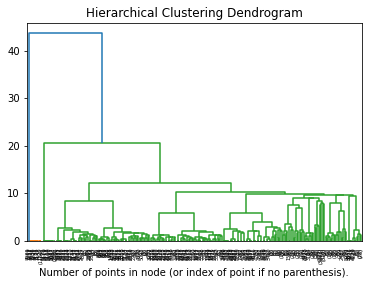

In [45]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [46]:
# K-means로 군집 개수를 수동으로 정해서 문서 군집화시키기
from sklearn.cluster import KMeans

# 일단 DBSCAN에서 나온 16개 클러스터로 분류
kmeans = KMeans(n_clusters=16, max_iter=10000, random_state=42)
# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(ftr_vect)

# 군집화한 레이블값들을 df 에 추가하기
df['cluster_label_kmeans'] = cluster_label
# print(df.sort_values(by=['cluster_label_kmeans']))

In [47]:
for i in range(0, len(cluster_label)):
    print(cluster_label[i])

9
9
9
9
9
9
9
9
9
9
5
9
9
14
5
5
9
9
9
9
5
15
9
9
0
9
0
9
5
15
5
9
5
4
9
9
9
9
9
9
9
5
9
9
9
9
5
9
9
9
9
9
9
9
9
9
10
9
9
5
9
9
9
5
5
9
5
5
5
9
5
4
4
4
7
4
9
4
4
7
7
9
7
5
5
5
7
7
7
7
7
9
9
7
9
7
9
7
14
7
7
13
9
9
9
7
7
7
9
9
7
7
7
9
14
7
7
14
4
4
4
9
15
7
9
7
15
4
4
7
7
4
9
4
4
9
4
9
7
9
4
4
4
9
4
9
4
15
4
15
9
15
9
1
9
9
9
9
9
9
0
15
9
15
9
9
9
15
14
9
9
0
9
9
9
9
0
9
9
9
9
9
9
9
7
7
7
9
7
9
9
9
15
9
15
9
9
9
9
9
15
7
0
9
9
9
9
13
5
9
9
9
9
15
7
9
4
4
9
4
9
9
6
9
9
9
9
9
9
9
9
9
6
9
9
9
9
9
9
6
9
6
6
6
6
6
9
5
6
5
9
6
6
6
6
14
6
9
6
6
6
14
6
6
6
9
6
6
9
9
9
6
6
9
6
6
9
9
9
9
9
9
5
9
9
9
9
10
9
9
5
9
9
5
9
9
9
14
9
9
9
9
9
9
9
9
9
9
5
9
9
9
9
15
5
9
5
9
9
9
15
7
9
9
9
7
9
9
7
1
5
9
9
9
9
9
8
9
9
7
5
5
9
9
9
7
9
9
7
7
7
5
7
4
5
9
15
1
7
7
7
5
15
9
5
7
9
15
9
9
7
9
9
9
15
9
9
9
9
4
9
9
9
9
9
9
9
7
9
2
2
2
9
2
9
2
2
2
9
2
9
2
9
2
10
9
9
9
9
9
9
9
9
6
9
9
9
6
9
9
1
6
9
9
9
9
9
9
14
9
15
9
1
15
15
14
9
9
9
9
9
9
9
9
9
9
9
9
9
0
5
9
9
9
9
9
14
9
6
4
9
9
5
9
10
6
2
2
9
9
9
4
9
9
9
5
9
9
9
9


다음은 K-means의 알고리즘의 특성 중 하나인 각 클러스터의 중심 좌표를 반환해주는 것을 이용해보자. 각 Feature들과 클러스터의 중심 간의 상대적인 위치를 반환해주는 값들을 활용해 군집별 핵심 단어를 추출해볼 수 있다. 주의할 점은 위치값들은 0~1사이의 값으로 나오게 되는데 1로 갈수록 특정 단어 Feature와 클러스터 중심과의 거리가 멀리 떨어져 있다는 것이 아닌 가장 가깝고 관계가 있다는 의미라는 것을 알아두자. 우선 각 Feature와 클러스터 중심간의 상대적인 위치값을 살펴보자.

In [48]:
# 문서의 feature(단어별) cluster_centers_확인해보자
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)
# shape의 행은 클러스터 레이블, 열은 벡터화 시킨 feature(단어들)

(16, 2912)
[[0.         0.         0.         ... 0.00258854 0.         0.00289074]
 [0.         0.         0.         ... 0.00234537 0.00256936 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00908655 0.00908655 0.00548719 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [49]:
df.head()

,title,content,nouns,result,cluster_label_kmeans
0,"오정연 ""날씨 파악 못 한 옷차림""",스포츠경향 방송국 아나운서 출신 방송인 오정연이 에 유머러스한 멘트를 더 한 사진...,"[스포츠경향, 방송국, 아나운서, 출신, 방송인, 오정연, 멘트, 더, 사진, 오정...",-1,9
1,Russia Navalny Protests,...,"[연합뉴스, 앱, 지금, 바로, 다운, 저작권, 연합뉴스, 무단, 재, 재, 배포,...",0,9
2,"정세균 ""이재명, 러 백신 언급 전 먼저 정부에 물어봤어야""",정세균 전 국무총리가 이재명 경기도지사의 신종 코로나바이러스 감염증코로나 러시아산...,"[정세균, 전, 국무총리, 이재명, 도지사, 신종, 코로나바이러스, 감염증, 코로나...",-1,9
3,남원 대나무밭 화재 현장서 80대 남성 숨진 채 발견,남원연합뉴스 홍인철 기자 일 오후 시 분께 전북 남원시 보절면 도룡리의 한 마을 ...,"[남원, 연합뉴스, 홍인, 철, 기자, 오후, 전북, 남원시, 보절면, 도룡리, 마...",-1,9
4,"너무나 매력적인 그녀, 조 카잔_요주의 여성 #11",내가 남자라면 저런 여자랑 사랑에 빠졌을 꺼야 루비 스팍스에서 조 카잔을 처음 봤...,"[내, 남자라면, 저런, 여자, 사랑, 루비, 스팍스, 조, 카잔, 처음, 때, 생...",-1,9


In [50]:
def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=10):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 10개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 10개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        # 해당 cluster_num으로 분류된 제목명 넣어주기
        titles = cluster_data[cluster_data['cluster_label_kmeans']==cluster_num]['title']
        # titles가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        titles = titles.values.tolist()
        cluster_details[cluster_num]['titles'] = titles
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['titles'][:5]}")
        print('-'*20)

feature_names = tfidf_vectorizer.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=df,
                                     feature_names=feature_names,
                                     cluster_num=3,
                                     top_n_features=10)
print_cluster_details(cluster_details)

#####Cluster Num: 0

상위 10개 feature단어들:
 ['삼성', '위안부', '뷰캐넌', 'boxing', 'australia boxing', 'australia', '피렐라', '업무협약', '판결', '삼성 피렐라']

Cluster 0으로 분류된 문서들:
["1차 승소 '위안부' 할머니들도 배상 받기까진 '산 넘어 산'", "'뒤집힌 정의'..일본에 위안부 배상책임 못 묻는다는 법원", "법원, '위안부' 2차 소송 각하..'국가면제' 인정", '정의용 "일본, 위안부 협상 현실적 대안 내놔도 억지주장만 반복"', "30년 위안부 투쟁사 '최대 암초'..일 정부 사죄·배상 가로막혀"]
--------------------
#####Cluster Num: 1

상위 10개 feature단어들:
 ['포토', '트와이스', '포토 트와이스', '김진욱', '함덕주', '김민우', '김유신', '포토 류준열', '류준열', '포토 김유신']

Cluster 1으로 분류된 문서들:
['[HI★포토] 신하균, \'괴물\' 비하인드 "출연진 연기 훌륭"', '[포토] 광주 거리 환하게 밝힐 봄꽃들', '[포토] 경찰서로 변신한 폐교', '[포토] 벌써 여름날씨', '[포토]이승로 성북구청장 장애인의 날을 맞아 소통과 공감 시간 보내']
--------------------
#####Cluster Num: 2

상위 10개 feature단어들:
 ['ramadan islam belief', 'islam belief', 'ramadan islam', 'islam', 'ramadan', 'belief', 'india kashmir ramadan islam', 'kashmir ramadan islam', 'kashmir ramadan islam belief', 'india kashmir ramadan islam belief']

Cluster 2으로 분류된 문서들:
['PAKISTAN RAMADAN ISLAM BELIEF', 'PAKISTAN RAMA

문서들간의 유사도는 어떻게 측정할까? 이는 단어의 의미적인 관계를 고려해야하기 때문에 단어를 벡터화하여 벡터들 간의 거리를 측정한다. 벡터간의 거리를 대표적인 방법으로는 '유클리디안 거리'가 있지만 '유클리디안 거리'는 이는 단어 빈도수 측면에서 한계가 존재한다.

따라서 코사인 유사도(Cosine Similarity)를 사용한다. 즉 벡터들 간의 사잇값을 계산하여 유사도를 측정하게 된다. 벡터간의 거리에 대한 여러가지 측정 방법은 여기를 참고하자.

코사인 유사도는 두 벡터간의 각도에 따라 -1 ~ 1 사이의 값으로 계산이 된다. 그리고 그 각도에 따라 두 벡터(NLP에서는 2개의 단어들)간의 관계를 파악할 수 있다.

하지만 텍스트 즉, 단어들을 Feature화 시킬 때 음수값이 나올 수 없으므로 Cosine 180° 인 경우는 존재하지 않는다. 따라서 단어 벡터들간의 유사도는 0 ~ 1사이의 값으로 나오게 된다.

코사인 유사도는 Scikit-learn에서 API를 제공해준다. cosine_similarity() 함수로 제공하는데, X와 y인자가 들어간다. 즉, X라는 벡터(들)에 대해서 y벡터(들)간의 유사도를 행렬로 보여준다. 마치 변수들 간의 상관관계 행렬처럼 말이다.

이제 K-means 실습 때 수행했던 문서들 간의 군집화 결과를 바탕으로 특정 클러스터 레이블의 문서 하나를 선정하고 그와 똑같은 label 문서들 간의 유사도를 직접 측정해보자. 

In [51]:
# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity

hotel_idx = df[df['cluster_label_kmeans']==1].index
print("이름 카테고리로 클러스터링된 문서들의 인덱스:\n",hotel_idx)
print()
# 이름 카테고리로 클러스터링 된 문서들의 인덱스 중 하나 선택해 비교 기준으로 삼을 문서 선정
comparison_doc = df.iloc[hotel_idx[0]]['title']
print("##유사도 비교 기준 문서 이름:",comparison_doc,'##')
print()

# 위에서 추출한 이름 카테고리로 클러스터링된 문서들의 인덱스 중 0번인덱스(비교기준문서)제외한
# 다른 문서들과의 유사도 측정
similarity = cosine_similarity(ftr_vect[hotel_idx[0]], ftr_vect[hotel_idx])
print(similarity)


이름 카테고리로 클러스터링된 문서들의 인덱스:
 Int64Index([ 153,  329,  357,  420,  432,  866,  868,  875,  883,  887,
            ...
            7013, 7040, 7046, 7101, 7134, 7164, 7182, 7207, 7229, 7254],
           dtype='int64', length=511)

##유사도 비교 기준 문서 이름: [HI★포토] 신하균, '괴물' 비하인드 "출연진 연기 훌륭" ##

[[1.         0.13349645 0.29678742 0.11847007 0.07745217 0.0556119
  0.13263265 0.07093713 0.1003454  0.05234192 0.06261998 0.10382423
  0.05693417 0.08528549 0.0798207  0.05724951 0.09770659 0.06103754
  0.10175421 0.06212824 0.08413942 0.08954551 0.08413942 0.08962477
  0.06887967 0.06917429 0.06620574 0.10661716 0.08342246 0.09626234
  0.09770659 0.05736072 0.13432262 0.09314114 0.09314114 0.08158484
  0.10363264 0.09939336 0.09314114 0.07555689 0.07801932 0.06944913
  0.12506101 0.29678742 0.08618971 0.06182713 0.06601741 0.05824397
  0.08023069 0.07037706 0.08195529 0.07068424 0.08833631 0.07632307
  0.09069289 0.07248397 0.07946968 0.08025556 0.09936402 0.12210279
  0.10651694 0.08603493 0.29678742 0

In [52]:
# 한글 폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# 나눔글꼴 설치해야 함!

import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# fontpath = 'C:/Windows/Fonts/malgun.ttf' # for Windows
# font = fm.FontProperties(fname=fontpath, size=9).get_name()
# plt.rc('font', family=font)
plt.rc('font', family='AppleGothic') # for Mac

Int64Index([2793, 2656, 5390, 2268, 2274, 2489, 2501, 2533, 2535, 2566,
            ...
            2276, 2451, 6895, 1961, 2774, 6878, 6884, 6715, 6517, 2027],
           dtype='int64', length=510)
[0.74350232 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742
 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742
 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742
 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742
 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742
 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742 0.29678742
 0.16790188 0.15809113 0.15637401 0.14430804 0.14051725 0.14051725
 0.13991551 0.13991551 0.13929572 0.13929572 0.13799672 0.13587563
 0.13511467 0.13511467 0.13511467 0.13432262 0.13349645 0.13349645
 0.13349645 0.13349645 0.13263265 0.13263265 0.13172711 0.13077496
 0.1297704  0.1297704  0.1297704  0.1297704  0.1297704  0.1297704
 0.1297704  0.1297704  0.1297704  0.1297704  0.1297704  0.1297704

Text(0.5, 1.0, '[HI★포토] 신하균, \'괴물\' 비하인드 "출연진 연기 훌륭"')

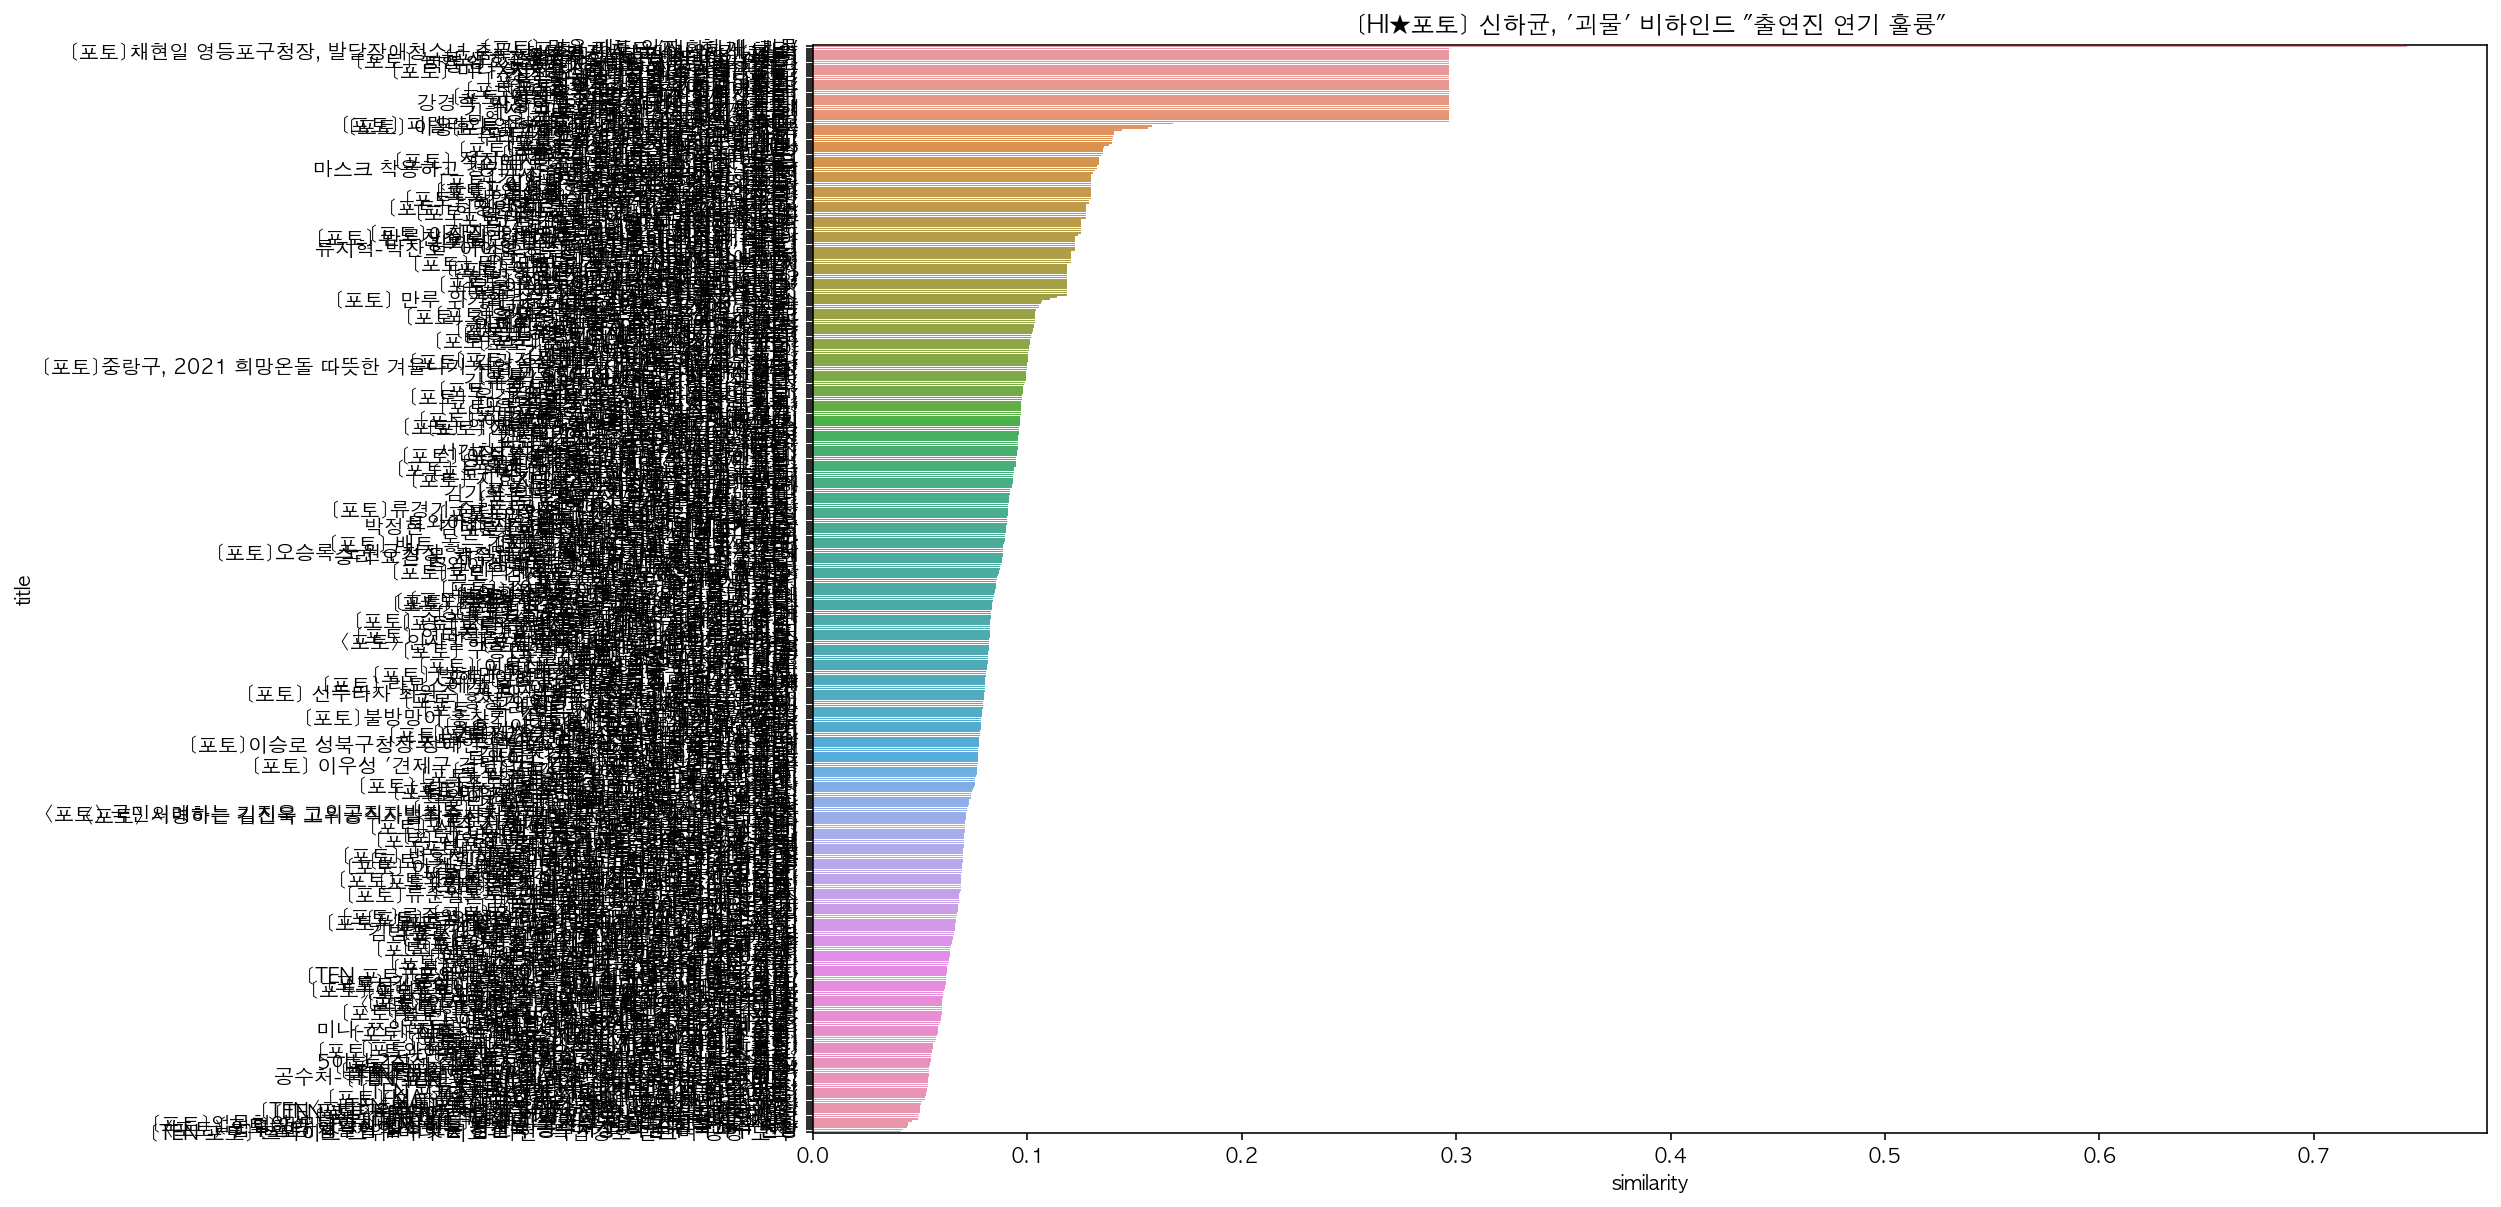

In [53]:
# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든행에 대해서 열을 내림차순으로!
sorted_idx = similarity.argsort()[:,::-1]
# 비교문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]

# 유사도가 큰 순으로 hotel_idx(label=1인 즉, 호텔과관련된 내용의 문서이름들의 index들)에서 재 정렬 
# index로 넣으려면 1차원으로 reshape해주기!
hotel_sorted_idx = hotel_idx[sorted_idx.reshape(-1,)]
# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
hotel_sim_values = np.sort(similarity.reshape(-1,))[::-1]
hotel_sim_values = hotel_sim_values[1:]
# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
print(hotel_sorted_idx)
print(hotel_sim_values)
print()
print("길이 비교", len(hotel_sorted_idx), len(hotel_sim_values))
print()
# 빈 데이터프레임 생성
hotel_sim_df = pd.DataFrame()
# hotel_sorted_idx 와 hotel_sim_values 매핑시킨 array임
hotel_sim_df['title'] = df.iloc[hotel_sorted_idx]['title']
hotel_sim_df['similarity'] = hotel_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=hotel_sim_df, x='similarity', y='title')
plt.title(comparison_doc)

# 한글 깨짐!

In [54]:
from gensim.models import Word2Vec

# size를 바꿔서 차원 개수를 조정
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [55]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

print(model.wv.most_similar("뉴스"))

from gensim.models import KeyedVectors

model.wv.save('daum_news_w2v.model')
model.wv.save_word2vec_format('daum_news_w2v') # 모델 저장

[('채팅', 0.7570301294326782), ('박상진', 0.7458284497261047), ('노컷뉴스', 0.7324444055557251), ('제보', 0.7286884188652039), ('한경닷컴', 0.7200997471809387), ('박대성', 0.7164747714996338), ('카톡', 0.7122976183891296), ('취재', 0.6889392137527466), ('박상현', 0.6837128400802612), ('윤수', 0.6805312037467957)]
